## Introduction

This is a second tutorial for those who wants to start career as a cheminformatics.

In [155]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit import DataStructs

In [14]:
import time
print(time.asctime()) #return by local time

Mon Aug 15 10:31:52 2022


The basics chemical functionality(e.g reading/writing molecules, substructure searching, molecular cleanup, etc) is in the rdkit.Chem module. More adavnced or less rrequently used, functionlity is in rdkit.Chem.AllChem.

In [4]:
mol = "C1=CC=C2C=C3C=C4C=C5C=CC=CC5=CC4=CC3=CC2=C1"
mol = Chem.MolFromSmiles(mol)
print(mol)

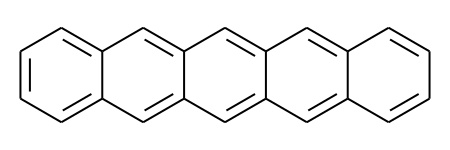

In [5]:
mol

#### Convert a RDKIT molecule to SMILES

In [7]:
smi = Chem.MolToSmiles(mol)
smi

'c1ccc2cc3cc4cc5ccccc5cc4cc3cc2c1'

#### Convert a RDKit molecule to InchiKey

In [8]:
Chem.MolToInchiKey(mol)

'SLIUAWYAILUBJU-UHFFFAOYSA-N'

#### Convert a RDKit molecule to coordinative representation

In [9]:
mol_block = Chem.MolToMolBlock(mol)
print(mol_block)


     RDKit          2D

 22 26  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -8.2500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -9.7500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -10.5000    5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -9.7500    6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -8.2500    6.4952    0

#### Reading sets of molecules

Major types of moleculear file formats:
* .csv file that contains a column of SMILES
* .smi/.txt file that includes SMILES as a list

#### Draw molecules in grid

In [11]:
smiles = [

    "CC(O)C",
    "CC(=O)C",
    "CC(CC)C",
    "CC(C)CC(=O)",
    "c1c(N(=O)=O)cccc1",
    "c1c(N(=O)=O)cccc1"
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

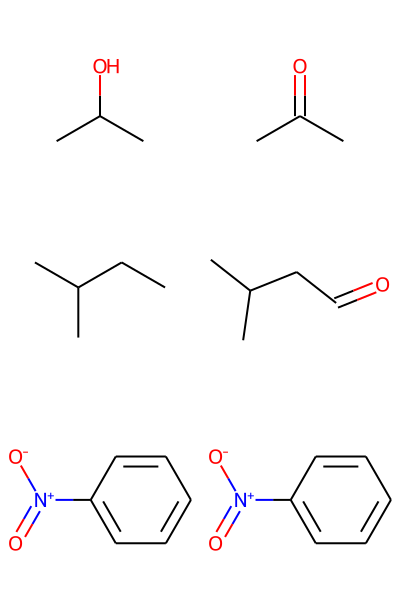

In [12]:
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

#### PandasTools

The PandasTools enables using RDKit molecules as columns of a Pandas DataFrame.

In [238]:
path = os.getcwd()
url = "https://raw.githubusercontent.com/jamesleocodes/rdkit_basics/master/data/delaney.csv"
data = pd.read_csv(url, usecols = ["SMILES","measured log(solubility:mol/L)"])
data = data[["SMILES","measured log(solubility:mol/L)"]] # rearrange columns

In [239]:
data.head()

,SMILES,measured log(solubility:mol/L)
0,ClCC(Cl)(Cl)Cl,-2.18
1,CC(Cl)(Cl)Cl,-2.00
2,ClC(Cl)C(Cl)Cl,-1.74
3,ClCC(Cl)Cl,-1.48
4,FC(F)(Cl)C(F)(Cl)Cl,-3.04


#### Add ROMol to Pandas Dataframe

,SMILES,measured log(solubility:mol/L),ROMol,Tanimoto_Similarity (ECFP4)
1143,CNC(=O)Oc1cc(C)cc(C)c1,-2.581,,0.0

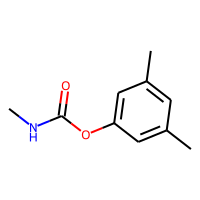

In [277]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol="SMILES")
data.tail(1)

In [241]:
print(type(data.ROMol[0]))

<class 'rdkit.Chem.rdchem.Mol'>


ROMol column stores rdchem.Mol object.

#### Draw the molecules in grid with values from another columns

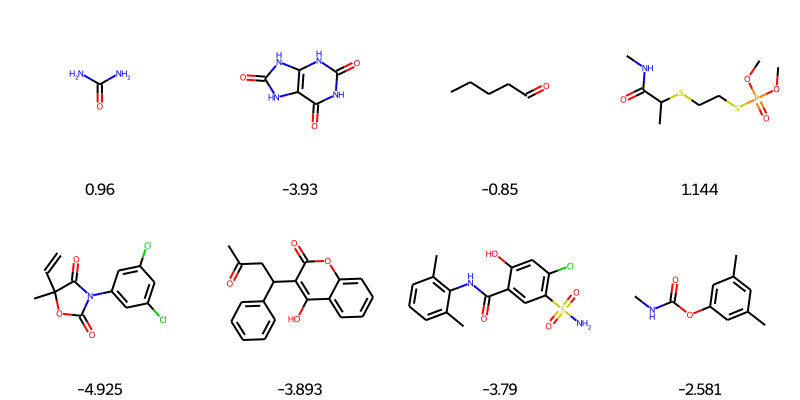

In [243]:
PandasTools.FrameToGridImage(data.tail(8), legendsCol="measured log(solubility:mol/L)", molsPerRow=4)

In [71]:
data.to_csv(path+"/data/clean.csv")

#### Adding new column to dataframe by using map method from pandas.

,SMILES,measured log(solubility:mol/L),ROMol,n_Atoms
0,ClCC(Cl)(Cl)Cl,-2.18,,6

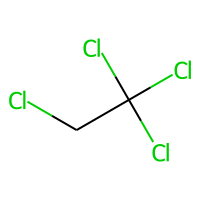

In [72]:
data['n_Atoms'] = data['ROMol'].map(lambda x: x.GetNumAtoms())
data.head(1)

It is suggested to drop "ROMol" column from dataframe for future calculation.

In [46]:
data = data.drop(['ROMol'], axis=1)
data.head(1)

,SMILES,measured log(solubility:mol/L),n_Atoms
0,ClCC(Cl)(Cl)Cl,-2.18,6


#### Descriptors/Fingerprints

There are number of built-in function for generating molecular fingerprints/descriptors. The instruction can be found [here.](https://www.rdkit.org/docs/RDKit_Book.html#additional-information-about-the-fingerprints)

In [265]:
url = "https://raw.githubusercontent.com/jamesleocodes/rdkit_basics/master/data/clean.csv"
data = pd.read_csv(url,index_col=0)

#### Morgan Fingerprint(ECFPx)

AllChem.GetMorganFingerprintAsBitVect Parameters
*   radius: no default value, usually set 2 for similarity search and 3 for machine learning.
*   nbits: number of bits,default is 2048. 1024 is also widely used.
*   other [parameters]([https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html) are usually left to default.

In [266]:
radius = 3
nBits = 1024
ECFP6 = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x),radius=radius, nBits=nBits) for x in data['SMILES']]

ECFP6 fingerprint for each molecule has 1024 bits.

In [267]:
len(ECFP6[0])

1024

We can save it for machine learning.

In [268]:
ecfp6_name = [f'Bit_{i}' for i in range(nBits)]
ecfp6_bits = [list(l) for l in ECFP6]
df_morgan = pd.DataFrame(ecfp6_bits, index=data.SMILES, columns= ecfp6_name)
df_morgan.head(1)


,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
SMILES,,,,,,,,,,,,,,,,,,,,,
ClCC(Cl)(Cl)Cl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Smilarity Search

We can compute the similarity of a reference molecule and a list of molecules. Here is an example of using ECFP4 fingerprint to compute the Tanimoto Similarity ( the default metric of DataStructs.FingerprintSimilarity)

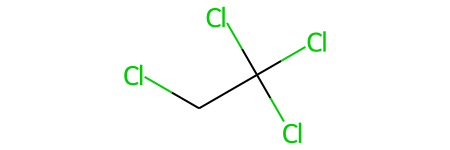

In [269]:
ref_smiles = data.SMILES[0]
ref_mol = Chem.MolFromSmiles(ref_smiles)
ref_ecfp4_fps = AllChem.GetMorganFingerprintAsBitVect(ref_mol,2)
ref_mol

In [270]:
bulk_ecfp4_fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x),2) for x in data['SMILES']]

In [271]:
similarity_efcp4 = [DataStructs.FingerprintSimilarity(ref_ecfp4_fps,x) for x in bulk_ecfp4_fps]

We can also add the smilarity_efcp4 to the dataframe and visualize the structure and similarity.

In [272]:
data['Tanimoto_Similarity (ECFP4)'] = similarity_efcp4

Sort the result from highest to lowest.

In [273]:
sorted_data = data.sort_values(['Tanimoto_Similarity (ECFP4)'], ascending=False)

The values are from highest to lowest.

In [276]:
sorted_data['Tanimoto_Similarity (ECFP4)'][0:9]

0       1.000000
579     0.333333
1083    0.333333
720     0.300000
23      0.300000
198     0.285714
1       0.272727
446     0.272727
497     0.272727
Name: Tanimoto_Similarity (ECFP4), dtype: float64

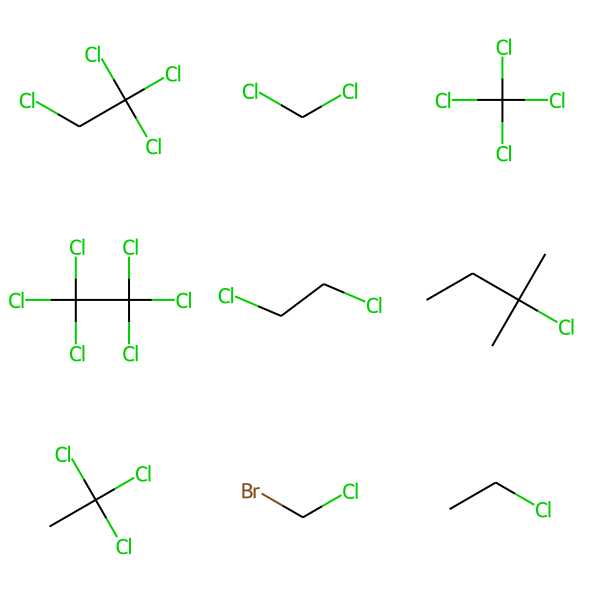

In [274]:
mol_list = [Chem.MolFromSmiles(x) for x in sorted_data['SMILES'][0:9]]
img = Draw.MolsToGridImage(mol_list)
img

## More Reading
1. [The RDKit Book](https://www.rdkit.org/docs/RDKit_Book.html)
2. [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html)